In [2]:
# Data analysis and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

# Stadistical analysis and data preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro

# Machine learning predicction 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Load and combination of dfs

In [3]:
df1 = pd.read_csv(r"C:\Users\Ral\Desktop\Project\uris.csv")
df2 = pd.read_csv(r"C:\Users\Ral\Desktop\Project\urls.csv")

df = pd.concat([df1, df2], ignore_index=True)

Check of nulls

In [4]:
df.isnull().sum()

name              0
url               0
category          0
subcategory      13
description    1878
addresses      5559
reporter          3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9906 non-null   object
 1   url          9906 non-null   object
 2   category     9906 non-null   object
 3   subcategory  9893 non-null   object
 4   description  8028 non-null   object
 5   addresses    4347 non-null   object
 6   reporter     9903 non-null   object
dtypes: object(7)
memory usage: 541.9+ KB


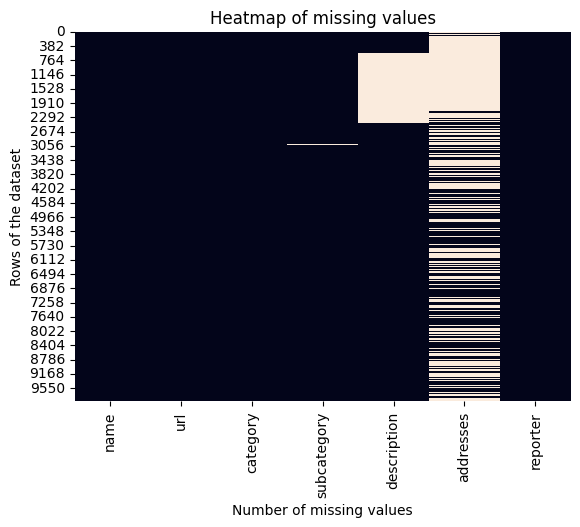

In [6]:
sns.heatmap(df.isnull(), cbar=False)
plt.xlabel("Number of missing values")
plt.ylabel("Rows of the dataset")
plt.title("Heatmap of missing values")
plt.show()

In [7]:
df[["addresses", "description", "subcategory"]].isnull().sum()

addresses      5559
description    1878
subcategory      13
dtype: int64

In [8]:
df.isnull().sum()

name              0
url               0
category          0
subcategory      13
description    1878
addresses      5559
reporter          3
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer

# Copy df 
df_filled = df.copy()

# Verifying if columns are present
required_columns = ["addresses", "description", "subcategory"]
missing_columns = [col for col in required_columns if col not in df_filled.columns]

if missing_columns:
    print(f"Error: columns not pressed: {missing_columns}")
else:
    # Imputar valores nulos en las columnas seleccionadas
    # Estrategia 1: Imputar con un valor constante (por ejemplo, "Unknown")
    df_filled["addresses"] = df_filled["addresses"].fillna("Unknown")
    df_filled["description"] = df_filled["description"].fillna("No description")
    
    # Estrategia 2: Imputar con la moda (el valor más frecuente) para "subcategory"
    mode_subcategory = df_filled["subcategory"].mode()[0]  # Calcula la moda
    df_filled["subcategory"] = df_filled["subcategory"].fillna(mode_subcategory)

    # Verify null values
    print(f"Null values left in df.\n {df_filled[required_columns].isnull().sum()}")

Null values left in df.
 addresses      0
description    0
subcategory    0
dtype: int64


In [10]:
# Verifying of null values in df
null_check = df_filled[required_columns].isnull().sum()

# Showing results of modifies df
if null_check.sum() == 0:
    print("Nulls values succesfuly removed")
else:
    print("There's still null values:")
    print(null_check)

Nulls values succesfuly removed


Outlier removal

In [11]:
# select numerical columns
numeric_columns = df_filled.select_dtypes(include=["float64", "int64"]).columns

# function IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Apply function to each column
outliers_dict = {}
for col in numeric_columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

# Show outliers
if outliers_dict:
    print("Outliers detected:")
    for col, outliers in outliers_dict.items():
        print(f"Column: {col}")
        print(outliers)
else:
    print("Outliers not detected.")

Outliers not detected.


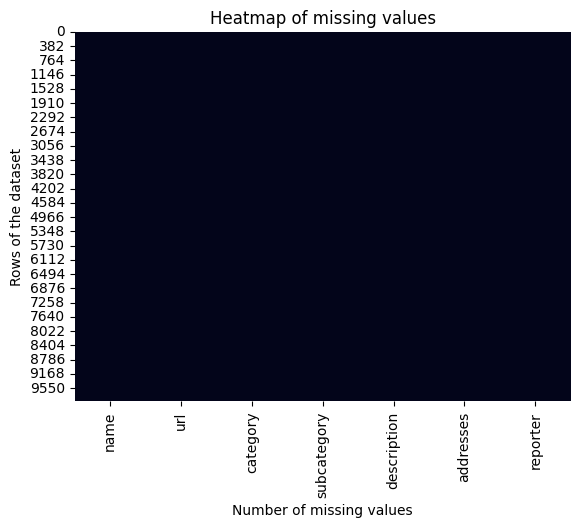

In [12]:
sns.heatmap(df_filled.isnull(), cbar=False)
plt.xlabel("Number of missing values")
plt.ylabel("Rows of the dataset")
plt.title("Heatmap of missing values")
plt.show()

In [13]:
df = df_filled.copy()

In [14]:
df.to_pickle("df_data.pkl")

In [15]:
df.to_csv("clean_data.csv", index=False)
